In [14]:
from combine_all_nse import combine_csv
out_name = "timeframe_2020"
start_date = "2020-01-01"
end_date = "2021-01-01"
combine_csv(out_name = out_name, start_date = start_date, end_date = end_date)

d:\Shrey\IIT GN\NCS\stock-market-crisis-analysis\combine_all_nse.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final_df.reset_index(inplace=True)


In [15]:
from preprocessing import preprocess
preprocess(out_name)
cleaned_name = out_name + "_cleaned"

In [16]:
from adjacency_matrix import build_adjaceny_matrix
build_adjaceny_matrix(cleaned_name, threshold=0.9)
adj_path = "adj/" + cleaned_name + ".csv"

In [17]:
from plot_graph import *
G = create_graph_from_adjacency(adj_path)
print("Number of nodes = ", G.number_of_nodes())
print("Number of edges = ", G.number_of_edges())
print("Average degree = ", sum([d for (n, d) in nx.degree(G)]) / float(G.number_of_nodes()))

Number of nodes =  1529
Number of edges =  27935
Average degree =  36.540222367560496


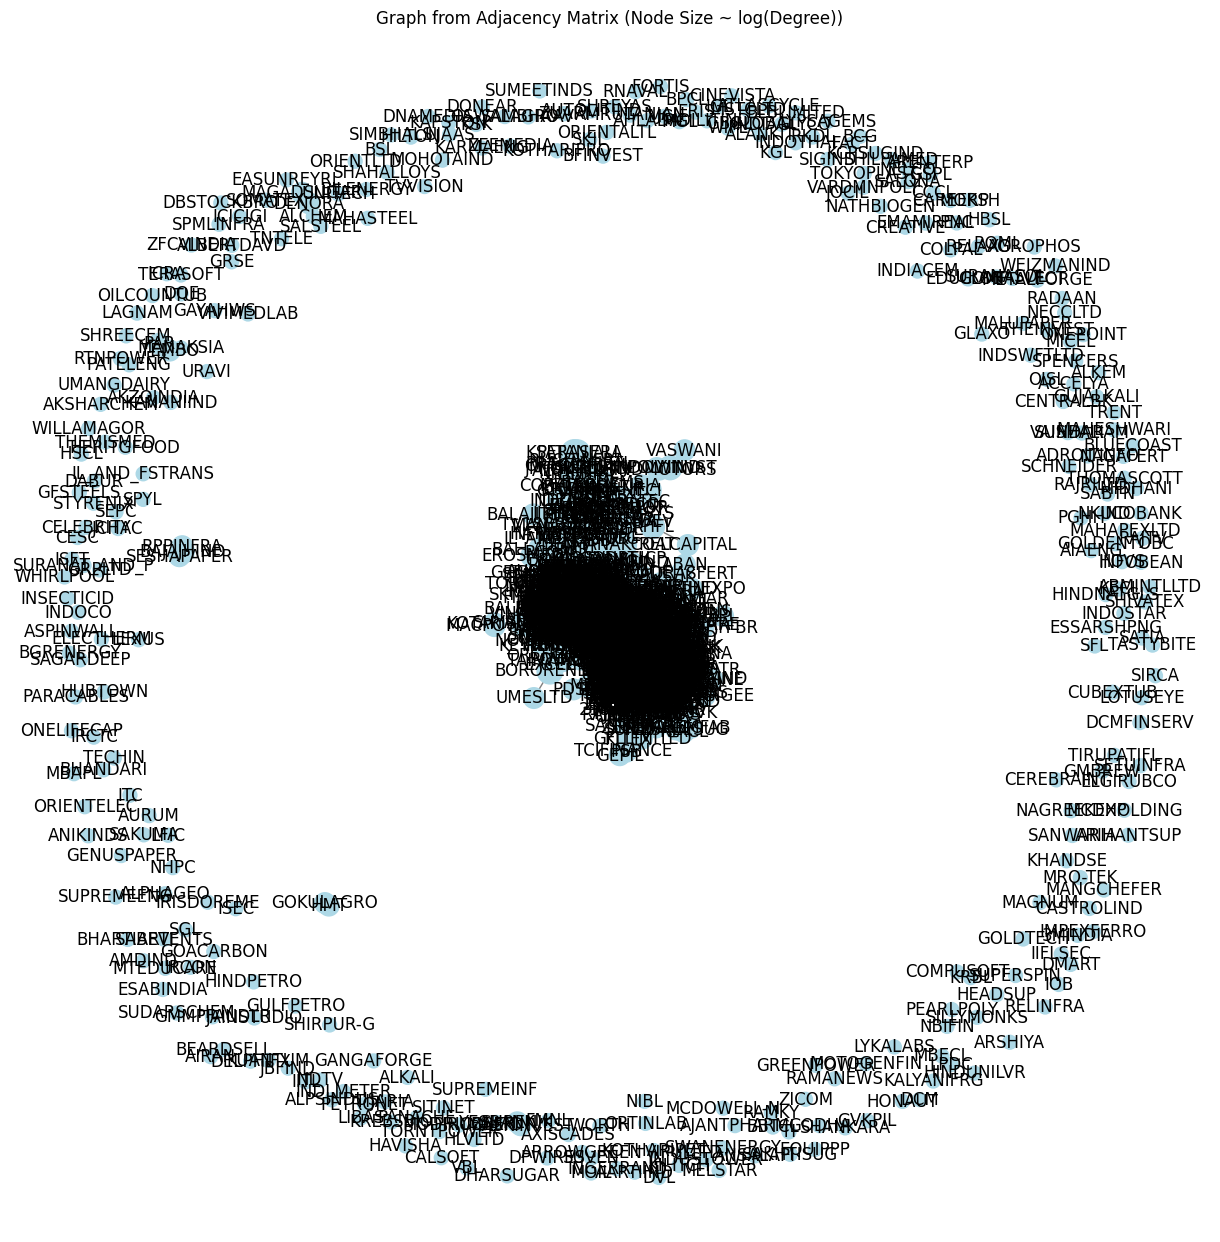

In [18]:
plot_graph(G)

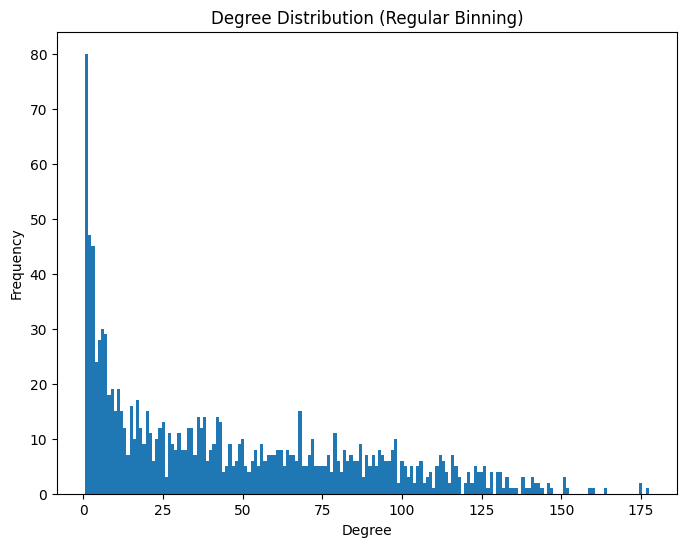

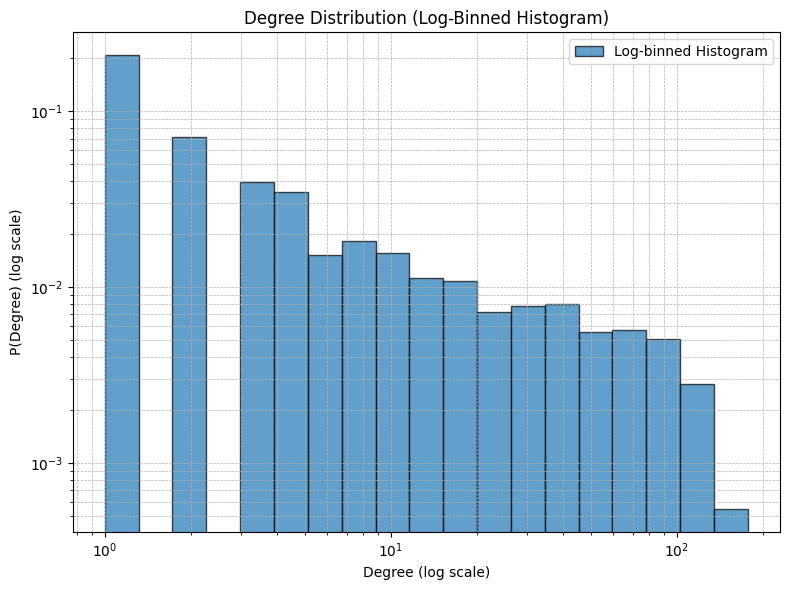

In [19]:
from degree_analysis import plot_degree_dist
plot_degree_dist(G)

In [20]:
from cluster_coeff import *
global_clustering, random_clustering = get_cluster_coeff(G)
print(f"Global Clustering Coefficient (Transitivity): {global_clustering:.4f}")
print(f"Random Graph Clustering Coefficient: {random_clustering:.4f}")

Global Clustering Coefficient (Transitivity): 0.4992
Random Graph Clustering Coefficient: 0.0243



📊 Top 10 Nodes by Degree - Clustering Coefficients:
        Node  Degree  Local Clustering Coef
0  INTELLECT     177               0.385015
1        HIL     175               0.357176
2     MASTEK     175               0.430608
3       JKIL     164               0.343035
4  APLAPOLLO     160               0.427201
5       CDSL     159               0.467319
6  FINCABLES     152               0.367985
7       GPIL     151               0.427638
8       PCBL     151               0.373157
9  VISAKAIND     151               0.365121


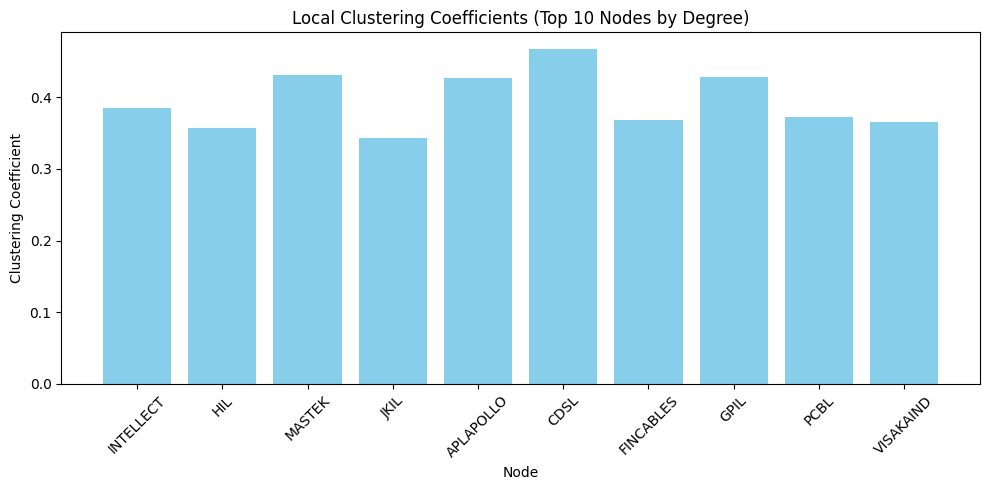

In [21]:
# plotting clustering coefficients of top 10 nodes by degree
plot_cluster_coefficient(G)

In [22]:
from communities import community_detection
partition, modularity, num_communities = community_detection(G)
print(f"Number of communities: {num_communities}")
print(f"Modularity score: {modularity:.4f}")

Number of communities: 320
Modularity score: 0.5640


In [23]:
### OPTIONAL #####
from collections import Counter
community_sizes = Counter(partition.values())
print("Community sizes:")
for community_id, size in community_sizes.items():
    print(f"Community {community_id}: {size} nodes")

Community sizes:
Community 0: 322 nodes
Community 5: 419 nodes
Community 17: 299 nodes
Community 3: 1 nodes
Community 16: 87 nodes
Community 6: 1 nodes
Community 7: 1 nodes
Community 8: 1 nodes
Community 9: 1 nodes
Community 32: 77 nodes
Community 11: 1 nodes
Community 12: 1 nodes
Community 13: 1 nodes
Community 14: 1 nodes
Community 15: 1 nodes
Community 18: 1 nodes
Community 19: 1 nodes
Community 20: 1 nodes
Community 21: 1 nodes
Community 22: 1 nodes
Community 23: 1 nodes
Community 24: 1 nodes
Community 26: 1 nodes
Community 27: 1 nodes
Community 28: 1 nodes
Community 29: 1 nodes
Community 30: 1 nodes
Community 31: 1 nodes
Community 33: 1 nodes
Community 34: 1 nodes
Community 35: 1 nodes
Community 36: 1 nodes
Community 37: 1 nodes
Community 39: 1 nodes
Community 40: 1 nodes
Community 41: 1 nodes
Community 42: 1 nodes
Community 44: 3 nodes
Community 46: 2 nodes
Community 47: 1 nodes
Community 48: 1 nodes
Community 50: 1 nodes
Community 51: 1 nodes
Community 52: 1 nodes
Community 53: 

In [24]:
from centralities import *
k = 3 # number of nodes to be extracted from the top and bottom of centralities scores
top_nodes = get_top_nodes_by_centrality(G,k)
bottom_nodes = get_bottom_nodes_by_centrality(G,k)

In [25]:
from shockwave import build_graph_from_correlation_csv
corr_path = "adj/" + cleaned_name + ".csv"
G_corr = build_graph_from_correlation_csv(corr_path)

In [26]:
from simulation_shock import *
initial_shock = -0.05
steps = 4
decay = 0.2
simulate_shocks_from_top_central_nodes(G_corr,top_nodes,initial_shock=initial_shock, steps=steps, decay=decay)
simulate_shocks_from_bottom_central_nodes(G_corr,bottom_nodes,initial_shock=initial_shock, steps=steps, decay=decay)


🚨 Simulating shock from top 1 Closeness node: SUMMITSEC
🔻 Number of stocks that fell: 1110
🔺 Stocks that rose: []
📉 Total network shock: -6023.2579

🚨 Simulating shock from top 2 Closeness node: GRASIM
🔻 Number of stocks that fell: 1091
🔺 Stocks that rose: []
📉 Total network shock: -7995.2554

🚨 Simulating shock from top 3 Closeness node: EMKAY
🔻 Number of stocks that fell: 1107
🔺 Stocks that rose: []
📉 Total network shock: -5449.7093

🚨 Simulating shock from top 1 Betweenness node: VISAKAIND
🔻 Number of stocks that fell: 978
🔺 Stocks that rose: []
📉 Total network shock: -11734.9191

🚨 Simulating shock from top 2 Betweenness node: DAAWAT
🔻 Number of stocks that fell: 808
🔺 Stocks that rose: []
📉 Total network shock: -2999.1018

🚨 Simulating shock from top 3 Betweenness node: SPTL
🔻 Number of stocks that fell: 601
🔺 Stocks that rose: []
📉 Total network shock: -79.7668

🚨 Simulating shock from top 1 Eigenvector node: MASTEK
🔻 Number of stocks that fell: 917
🔺 Stocks that rose: []
📉 Tota